In [56]:
### Install and load packages
# 
# #!pip install uncertainties              # uncomment to install dependancy

from scipy.optimize import curve_fit     # tool for curve fitting
import scipy                             # includes tools for data analysis
import scipy.stats
import numpy as np                       # import the tools of NumPy but use a shorter name, "np"
from matplotlib import pyplot as plt     # tools for plotting
import pandas as pd

import uncertainties as un               # tool set for handling numbers with uncertainties
from uncertainties import unumpy as unp  # a replacement for numpy that uses uncertainty values

### Set global variables

location_data = "../data/"                   ## Use either local folde or github folder. use github locations for Colab
location_styles = "../styles/"
#location_data = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/data/"
#location_styles = "https://raw.githubusercontent.com/blinkletter/StealThisCode/main/styles/"

### Read in data set
datafile = "6A-bacteriaSurvival.csv"   # change this file for new data

df = pd.read_csv(location_data+datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="TEMP(K)", 
                 comment = "#") 
display(df)

,TIME (MIN),C51000,C71000,C75200,SSteel
0,0,1430000000,1430000000,1.600000e+09,1.770000e+09
1,15,1600000000,1030000000,1.600000e+09,1.590000e+09
2,30,927000000,927000000,9.270000e+08,1.430000e+09
3,45,282000000,670000000,NaN,1.430000e+09
4,60,315000000,540000000,NaN,1.150000e+09
5,75,534000,540000000,NaN,NaN
6,90,12100,540000000,4.850000e+08,1.430000e+09
7,105,1,163000,NaN,NaN
8,120,1,1,NaN,NaN
9,180,1,1,2.040000e+08,1.280000e+09


In [86]:
import scipy.interpolate

df75 = df[["TIME (MIN)","C75200"]].dropna()
dfSS = df[["TIME (MIN)","SSteel"]].dropna()

x = df["TIME (MIN)"]
C51 = df["C51000"]
C71 = df["C71000"]

C75 = df75["C75200"]
x75 = df75["TIME (MIN)"]

SS = dfSS["SSteel"]
xSS = dfSS["TIME (MIN)"]

#C51 = np.log10(C51)
#C71 = np.log10(C71)
#C75 = np.log10(C75)
#SS = np.log10(SS)


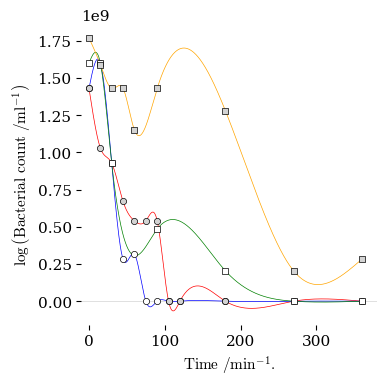

In [87]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\log\left(\text{Bacterial count}\ /\text{ml}^{-1}\right)$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
        #  ylim=[-3.5,10],
         # yticks = [0,2,4,6,8,10]
       )

#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x75,C75, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(xSS,SS, marker = None, color = "red", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.CubicSpline(x, C71, bc_type="natural")
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                               #method="akima" # Requires version 1.13 of SciPy
#                                               )
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                                #method="makima" # Requires version 1.13 of SciPy
#                                                )
ax.plot(xs, spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.CubicSpline(x, C51, bc_type="natural")
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               )  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.CubicSpline(x75, C75, bc_type="natural")
#spline = scipy.interpolate.PchipInterpolator(x75, C75)  
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "green", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.CubicSpline(xSS, SS, bc_type="natural")
#spline = scipy.interpolate.PchipInterpolator(xSS, SS)  
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "orange", linewidth=0.5, zorder = 0)


plt.savefig("plots/6A1.pdf")
plt.show()

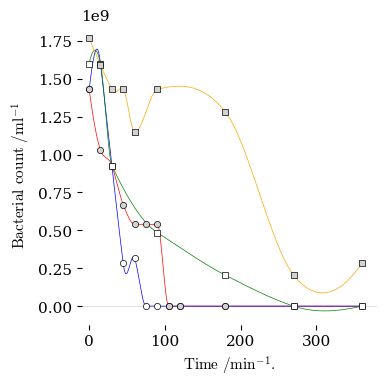

In [88]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
        #  ylim=[-3.5,10]
       )
#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x75,C75, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(xSS,SS, marker = None, color = "red", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
                                               #method="akima" # Requires version 1.13 of SciPy
                                               )
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                                #method="makima" # Requires version 1.13 of SciPy
#                                                )
ax.plot(xs, spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
                                               #method="akima"  # Requires version 1.13 of SciPy
                                               )  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0)

#spline = scipy.interpolate.PchipInterpolator(x75, C75)  
spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
                                               #method="akima"  # Requires version 1.13 of SciPy
                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "green", linewidth=0.5, zorder = 0)

#spline = scipy.interpolate.PchipInterpolator(xSS, SS)  
spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
                                               #method="akima"  # Requires version 1.13 of SciPy
                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "orange", linewidth=0.5, zorder = 0)


plt.savefig("plots/6A2.pdf")
plt.show()

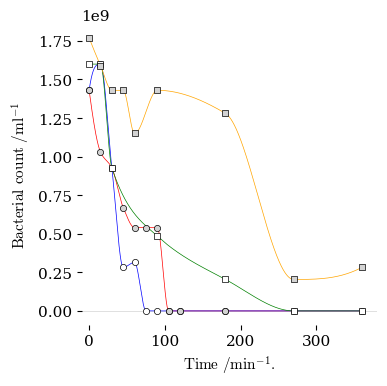

In [89]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
        #  ylim=[-3.5,10]
       )
#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(x75,C75, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
#ax.plot(xSS,SS, marker = None, color = "red", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)

spline = scipy.interpolate.PchipInterpolator(x, C71)  
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                               #method="akima" # Requires version 1.13 of SciPy
#                                               )
#spline = scipy.interpolate.Akima1DInterpolator(x, C71, 
#                                                #method="makima" # Requires version 1.13 of SciPy
#                                                )
ax.plot(xs, spline(xs), marker = None, color = "red", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.PchipInterpolator(x, C51)  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               )  
#spline = scipy.interpolate.Akima1DInterpolator(x, C51, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "blue", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.PchipInterpolator(x75, C75)  
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(x75, C75, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "green", linewidth=0.5, zorder = 0)

spline = scipy.interpolate.PchipInterpolator(xSS, SS)  
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="akima"  # Requires version 1.13 of SciPy
#                                               ) 
#spline = scipy.interpolate.Akima1DInterpolator(xSS, SS, 
#                                               #method="makima" # Requires version 1.13 of SciPy
#                                               )
ax.plot(xs, spline(xs), marker = None, color = "orange", linewidth=0.5, zorder = 0)


plt.savefig("plots/6A3.pdf")
plt.show()

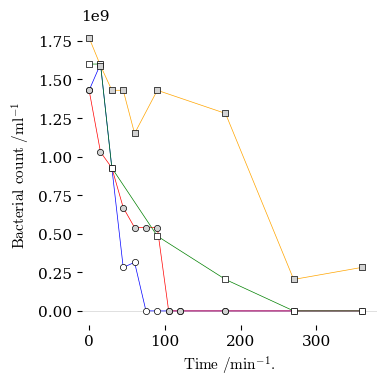

In [91]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
        #  ylim=[-3.5,10]
       )
#ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

#ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

#ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(x75,C75, marker = None, color = "green", linewidth=0.5, zorder = 0)

#ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(xSS,SS, marker = None, color = "orange", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)



plt.savefig("plots/6A4.pdf")
plt.show()

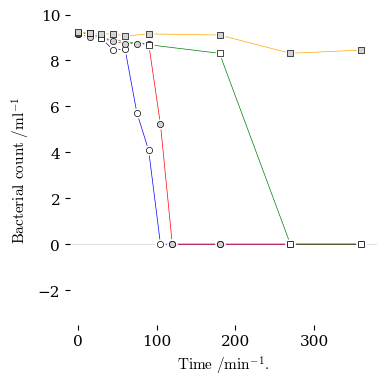

In [77]:

plt.rcdefaults()

style = "tufte.mplstyle"
style_name = location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  
ax.axhline(0, color = "lightgray", linewidth=0.5, zorder = 0)


# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\text{Bacterial count}\ /\text{ml}^{-1}$", 
#          yscale = 'log',
          xlabel=r"$\text{Time}\ /\text{min}^{-1}.$",                
          xlim=[-10, 380],                  
        #  ylim=[-3.5,10]
       )
ax.scatter(x, C51, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C51, marker = "o", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(x,C51, marker = None, color = "blue", linewidth=0.5, zorder = 0)

ax.scatter(x, C71, marker = "o", s = 40, color = "white", zorder = 1)
ax.scatter(x, C71, marker = "o", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(x,C71, marker = None, color = "red", linewidth=0.5, zorder = 0)

ax.scatter(x75, C75, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(x75, C75, marker = "s", s = 20, 
              facecolor = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(x75,C75, marker = None, color = "green", linewidth=0.5, zorder = 0)

ax.scatter(xSS, SS, marker = "s", s = 40, color = "white", zorder = 1)
ax.scatter(xSS, SS, marker = "s", s = 20, 
              facecolor = "lightgray", edgecolors = "black", 
              linewidths=0.5, zorder = 4) 
ax.plot(xSS,SS, marker = None, color = "orange", linewidth=0.5, zorder = 0)


xs = np.arange(0, 360, 0.1)



plt.savefig("plots/6A5.pdf")
plt.show()